## Compare TS variation in mooring, float, and ecco datasets

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

### Open datasets

Open ecco datasets (row 150)

In [2]:
theta_dir = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row150.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row150.nc')
theta_row150.close()
salt_row150.close()

In [3]:
# mask land cells
theta_row150_ocean = theta_row150.THETA.where(salt_row150.SALT>30,drop=True)
salt_row150_ocean = salt_row150.SALT.where(salt_row150.SALT>30,drop=True)

Open ecco datasets (APEX location)

In [83]:
# ecco time series at APEX float location
theta_dir = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

ecco_theta_apex_ds = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_APEX_location.nc')
ecco_salt_apex_ds = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_APEX_location.nc')

# mask land cells
ecco_theta_apex_ocean = ecco_theta_apex_ds.THETA.where(ecco_salt_apex_ds.SALT>30,drop=True)
ecco_salt_apex_ocean = ecco_salt_apex_ds.SALT.where(ecco_salt_apex_ds.SALT>30,drop=True)

Open float datasets

In [4]:
apex_float = xr.open_dataset('F:/PhD_chap3/data/OMG_Float_Data/melville_apex_float_2020to2023.nc')

In [53]:
# remove float observations when the float was farther north (outside of the trough)
apex_float_1 = apex_float.sel(date=slice(apex_float.isel(date=0).date,'2021-07-03')) # before it drifted north
apex_float_2 = apex_float.sel(date=slice('2021-09-17',apex_float.isel(date=-1).date)) # F9444 that stayed in trough

# combine the two
apex_float_ds = xr.concat((apex_float_1,apex_float_2), dim='date')

Open mooring datasets

In [6]:
file_dir = 'F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_interpolated/'

In [7]:
# open Rink data
rink_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Rink_1D_interpolated_temp_profile.nc")
rink_temp_da_interp.close()
rink_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Rink_1D_interpolated_salt_profile.nc")
rink_salt_da_interp.close()

In [8]:
# open Fisher Islands data
fisher_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Fisher_1D_interpolated_temp_profile.nc")
fisher_temp_da_interp.close()
fisher_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Fisher_1D_interpolated_salt_profile.nc")
fisher_salt_da_interp.close()

In [9]:
# open Kong Oscar data
kongoscar_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_temp_profile.nc")
kongoscar_temp_da_interp.close()
kongoscar_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_salt_profile.nc")
kongoscar_salt_da_interp.close()

In [10]:
# open Sverdrup data
sverdrup_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_temp_profile.nc")
sverdrup_temp_da_interp.close()
sverdrup_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_salt_profile.nc")
sverdrup_salt_da_interp.close()

### Compare TS magnitudes

#### Compare data between 220-240 m

The greatest depth we can use across all moorings is 220-240m \
Select those depths and combine mooring data

In [25]:
# 220-240 m

# temperature
rink_temp_220m_da = rink_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fish_temp_220m_da = fisher_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sver_temp_220m_da = sverdrup_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
kong_temp_220m_da = kongoscar_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

# salinity
rink_salt_220m_da = rink_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fish_salt_220m_da = fisher_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sver_salt_220m_da = sverdrup_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
kong_salt_220m_da = kongoscar_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

In [26]:
# take mean across sites
mooring_temp_220m_concat = xr.concat([rink_temp_220m_da, fish_temp_220m_da, sver_temp_220m_da, kong_temp_220m_da],dim='time')
mooring_salt_220m_concat = xr.concat([rink_salt_220m_da, fish_salt_220m_da, sver_salt_220m_da, kong_salt_220m_da],dim='time')

Groupby month

In [85]:
# ecco data
theta_row150_220m_month = theta_row150_ocean.sel(cols=slice(130,145),depth=slice(220,240)).mean(['depth','cols'], skipna=True).groupby('time.month').mean()
salt_row150_220m_month = salt_row150_ocean.sel(cols=slice(130,145),depth=slice(220,240)).mean(['depth','cols'], skipna=True).groupby('time.month').mean()

ecco_theta_apex_220m_month = ecco_theta_apex_ocean.sel(depth=slice(220,240)).mean(['depth'], skipna=True).groupby('time.month').mean()
ecco_salt_apex_220m_month = ecco_salt_apex_ocean.sel(depth=slice(220,240)).mean(['depth'], skipna=True).groupby('time.month').mean()

# float data
apex_float_220m_month = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-240,-220)).mean(dim='depth_bins', skipna=True).groupby('time.month').mean()

# mooring data
mooring_temp_220m_month = mooring_temp_220m_concat.groupby('time.month').mean()
mooring_salt_220m_month = mooring_salt_220m_concat.groupby('time.month').mean()

In [86]:
# reindex order of months for plotting
salt_row150_month_220m = salt_row150_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_month_220m = theta_row150_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_theta_apex_220m_month = ecco_theta_apex_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_salt_apex_220m_month = ecco_salt_apex_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

apex_float_month_220m = apex_float_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

mooring_temp_month_220m = mooring_temp_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_month_220m = mooring_salt_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [87]:
# rename index with month name
salt_row150_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_theta_apex_220m_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_salt_apex_220m_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

apex_float_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

mooring_temp_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

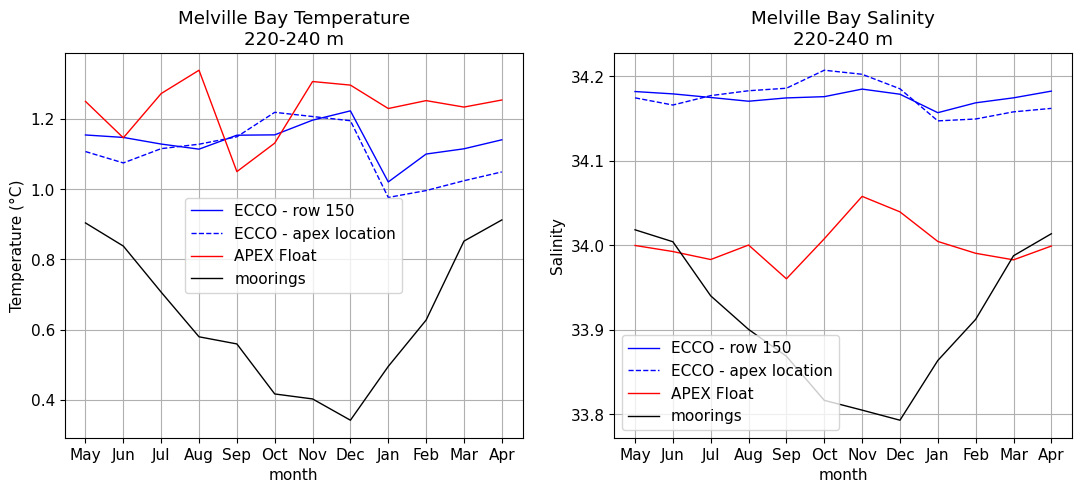

In [89]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_220m.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_220m_month.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_month_220m.temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_220m.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature\n220-240 m');

salt_row150_month_220m.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_220m_month.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_month_220m.salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_220m.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n220-240 m');

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Salinity");

#### Compare data between 320-380 m

We do not have observations at these depths for the kong oscar site

In [90]:
depth_range = slice(320,380)

In [59]:
# 320-380 m

# temperature
rink_temp_320m_da = rink_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)
fish_temp_320m_da = fisher_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)
sver_temp_320m_da = sverdrup_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)

# salinity
rink_salt_320m_da = rink_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)
fish_salt_320m_da = fisher_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)
sver_salt_320m_da = sverdrup_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)

In [60]:
# take mean across sites
mooring_temp_320m_concat = xr.concat([rink_temp_320m_da, fish_temp_320m_da, sver_temp_320m_da],dim='time')
mooring_salt_320m_concat = xr.concat([rink_salt_320m_da, fish_salt_320m_da, sver_salt_320m_da],dim='time')

First look at grid cell thickness to see whether weighting is necessary

In [61]:
## load geometry file
ecco_geometry = xr.open_dataset("SASSIE_N1_geometry_v3.nc")

## extract upper 72 depth cells to match melville ecco dataset
ecco_vert_thickness = ecco_geometry.isel(k=slice(0,72)).drF.rename({"k":"depth"}) # grid cell vertical thickness (m)

In [23]:
theta_row150_ocean.sel(cols=slice(100,150),depth=depth_range).depth

<xarray.DataArray 'depth' (depth: 2)>
array([325.32, 352.42], dtype=float32)
Coordinates:
  * depth    (depth) float32 325.3 352.4

In [48]:
ecco_geometry.swap_dims({"k":"Z"}).sel(Z=[325.32]).drF.values

array([26.46])

In [49]:
ecco_geometry.swap_dims({"k":"Z"}).sel(Z=[352.42]).drF.values

array([27.74])

The vertical thickness is virtually the same so I will not weight by grid cell thickness

Groupby month

In [91]:
# ecco data
theta_row150_320m_month = theta_row150_ocean.sel(cols=slice(130,145),depth=depth_range).mean(['depth','cols'], skipna=True).groupby('time.month').mean()
salt_row150_320m_month  = salt_row150_ocean.sel(cols=slice(130,145),depth=depth_range).mean(['depth','cols'], skipna=True).groupby('time.month').mean()

ecco_theta_apex_320m_month = ecco_theta_apex_ocean.sel(depth=depth_range).mean(['depth'], skipna=True).groupby('time.month').mean()
ecco_salt_apex_320m_month = ecco_salt_apex_ocean.sel(depth=depth_range).mean(['depth'], skipna=True).groupby('time.month').mean()

# float data
apex_float_320m_month = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-380,-320)).mean(dim='depth_bins', skipna=True).groupby('time.month').mean()

# mooring data
mooring_temp_320m_month = mooring_temp_320m_concat.groupby('time.month').mean()
mooring_salt_320m_month = mooring_salt_320m_concat.groupby('time.month').mean()

In [92]:
# reindex order of months for plotting
salt_row150_month_320m = salt_row150_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_month_320m = theta_row150_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_theta_apex_320m_month = ecco_theta_apex_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_salt_apex_320m_month = ecco_salt_apex_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

apex_float_month_320m = apex_float_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

mooring_temp_month_320m = mooring_temp_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_month_320m = mooring_salt_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [93]:
# rename index with month name
salt_row150_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_theta_apex_320m_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_salt_apex_320m_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

apex_float_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

mooring_temp_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

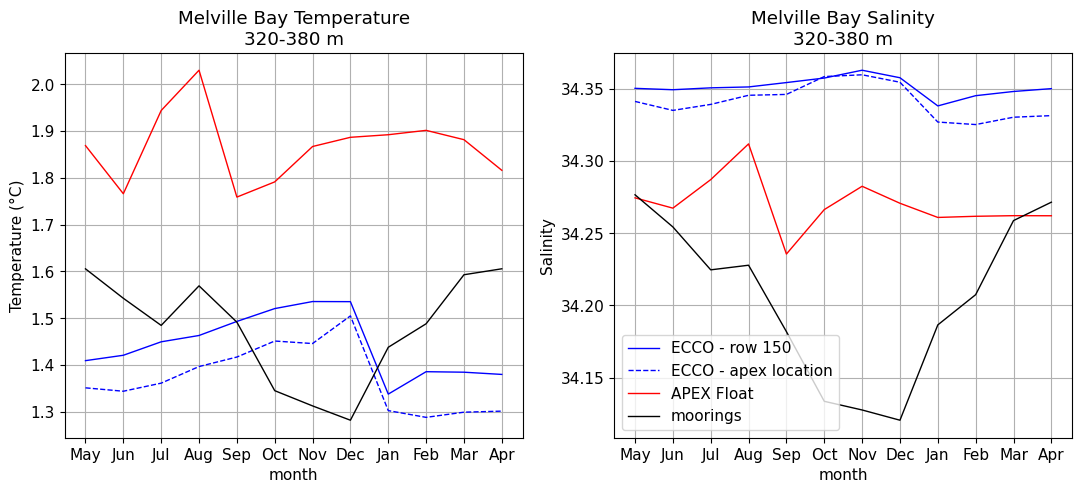

In [95]:
# temperature and salinity at 320-380 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_320m.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_320m_month.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_month_320m.temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_320m.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
# ax1.legend();
ax1.set_title('Melville Bay Temperature\n320-380 m');

salt_row150_month_320m.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_320m_month.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_month_320m.salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_320m.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n320-380 m');

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Salinity");

### Compare TS seasonal variabiliy

#### Detrend time series and plot again

In [96]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

220-240 m

In [97]:
# ecco data - row 150 -----------------
theta_row150_220m = theta_row150_ocean.sel(cols=slice(130,145),depth=slice(220,240)).mean(['depth','cols'], skipna=True)
salt_row150_220m = salt_row150_ocean.sel(cols=slice(130,145),depth=slice(220,240)).mean(['depth','cols'], skipna=True)

# detrend
theta_row150_detrended = detrend_dim(theta_row150_220m,'time')
salt_row150_detrended = detrend_dim(salt_row150_220m,'time')

# take monthly mean
theta_row150_220m_detrended_month = theta_row150_detrended.groupby('time.month').mean()
salt_row150_220m_detrended_month = salt_row150_detrended.groupby('time.month').mean()

# ecco data - apex location -----------------
ecco_theta_apex_220m = ecco_theta_apex_ocean.sel(depth=slice(220,240)).mean(['depth'], skipna=True)
ecco_salt_apex_220m = ecco_salt_apex_ocean.sel(depth=slice(220,240)).mean(['depth'], skipna=True)

# detrend
ecco_theta_apex_220m_detrended = detrend_dim(ecco_theta_apex_220m,'time')
ecco_salt_apex_220m_detrended = detrend_dim(ecco_salt_apex_220m,'time')

# take monthly mean
ecco_theta_apex_220m_detrended_month = ecco_theta_apex_220m_detrended.groupby('time.month').mean()
ecco_salt_apex_220m_detrended_month = ecco_salt_apex_220m_detrended.groupby('time.month').mean()

# float data -----------------
apex_float_220m = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-240,-220)).mean(dim='depth_bins', skipna=True)

# detrend
apex_float_220m_temp_detrended = detrend_dim(apex_float_220m.temperature,'time')
apex_float_220m_salt_detrended = detrend_dim(apex_float_220m.salinity,'time')

# take monthly mean
apex_float_220m_temp_detrended_month = apex_float_220m_temp_detrended.groupby('time.month').mean()
apex_float_220m_salt_detrended_month = apex_float_220m_salt_detrended.groupby('time.month').mean()

# mooring data -----------------
mooring_temp_220m_month = mooring_temp_220m_concat.groupby('time.month').mean()
mooring_salt_220m_month = mooring_salt_220m_concat.groupby('time.month').mean()

# detrend
mooring_temp_220m_detrended = detrend_dim(mooring_temp_220m_concat,'time')
mooring_salt_220m_detrended = detrend_dim(mooring_salt_220m_concat,'time')

# take monthly mean
mooring_temp_220m_detrended_month = mooring_temp_220m_detrended.groupby('time.month').mean()
mooring_salt_220m_detrended_month = mooring_salt_220m_detrended.groupby('time.month').mean()

In [98]:
# reindex order of months for plotting
theta_row150_220m_detrended_month = theta_row150_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row150_220m_detrended_month = salt_row150_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

ecco_theta_apex_220m_detrended_month = ecco_theta_apex_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_salt_apex_220m_detrended_month = ecco_salt_apex_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

apex_float_220m_temp_detrended_month = apex_float_220m_temp_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
apex_float_220m_salt_detrended_month = apex_float_220m_salt_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

mooring_temp_220m_detrended_month = mooring_temp_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_220m_detrended_month = mooring_salt_220m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [99]:
# rename index with month name
theta_row150_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row150_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

ecco_theta_apex_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_salt_apex_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

apex_float_220m_temp_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
apex_float_220m_salt_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

mooring_temp_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_220m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

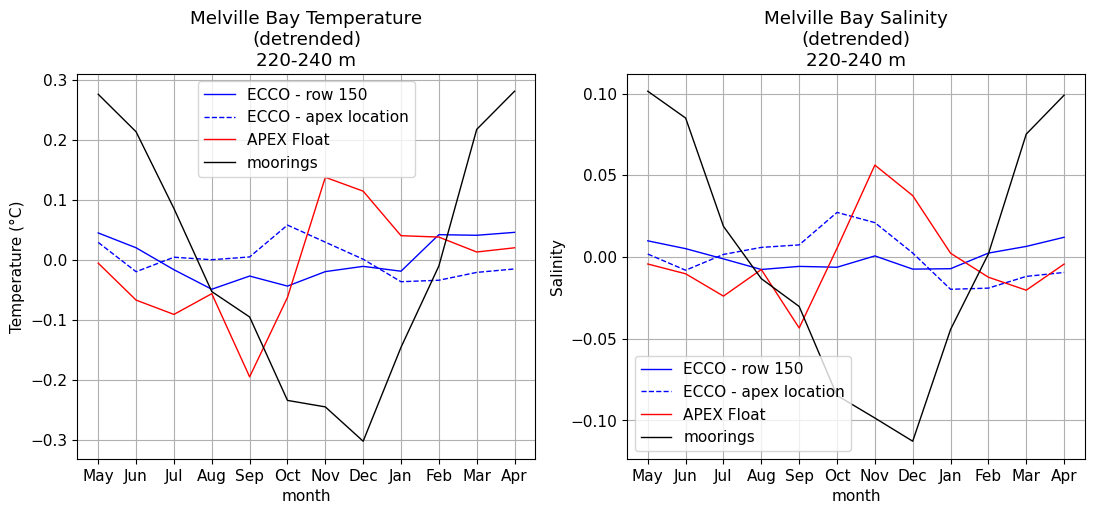

In [101]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_220m_detrended_month.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_220m_detrended_month.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_220m_temp_detrended_month.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_220m_detrended_month.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature\n(detrended)\n220-240 m');

salt_row150_220m_detrended_month.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_220m_detrended_month.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_220m_salt_detrended_month.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_220m_detrended_month.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n(detrended)\n220-240 m');

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Salinity");

320-380 m

In [102]:
# ecco data - row 150 -----------------
theta_row150_320m = theta_row150_ocean.sel(cols=slice(130,145),depth=slice(320,380)).mean(['depth','cols'], skipna=True)
salt_row150_320m = salt_row150_ocean.sel(cols=slice(130,145),depth=slice(320,380)).mean(['depth','cols'], skipna=True)

# detrend
theta_row150_detrended = detrend_dim(theta_row150_320m,'time')
salt_row150_detrended = detrend_dim(salt_row150_320m,'time')

# take monthly mean
theta_row150_320m_detrended_month = theta_row150_detrended.groupby('time.month').mean()
salt_row150_320m_detrended_month = salt_row150_detrended.groupby('time.month').mean()

# ecco data - apex location -----------------
ecco_theta_apex_320m = ecco_theta_apex_ocean.sel(depth=slice(320,380)).mean(['depth'], skipna=True)
ecco_salt_apex_320m = ecco_salt_apex_ocean.sel(depth=slice(320,380)).mean(['depth'], skipna=True)

# detrend
ecco_theta_apex_320m_detrended = detrend_dim(ecco_theta_apex_320m,'time')
ecco_salt_apex_320m_detrended = detrend_dim(ecco_salt_apex_320m,'time')

# take monthly mean
ecco_theta_apex_320m_detrended_month = ecco_theta_apex_320m_detrended.groupby('time.month').mean()
ecco_salt_apex_320m_detrended_month = ecco_salt_apex_320m_detrended.groupby('time.month').mean()

# float data -----------------
apex_float_320m = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-380,-320)).mean(dim='depth_bins', skipna=True)

# detrend
apex_float_320m_temp_detrended = detrend_dim(apex_float_320m.temperature,'time')
apex_float_320m_salt_detrended = detrend_dim(apex_float_320m.salinity,'time')

# take monthly mean
apex_float_320m_temp_detrended_month = apex_float_320m_temp_detrended.groupby('time.month').mean()
apex_float_320m_salt_detrended_month = apex_float_320m_salt_detrended.groupby('time.month').mean()

# mooring data -----------------
mooring_temp_320m_month = mooring_temp_320m_concat.groupby('time.month').mean()
mooring_salt_320m_month = mooring_salt_320m_concat.groupby('time.month').mean()

# detrend
mooring_temp_320m_detrended = detrend_dim(mooring_temp_320m_concat,'time')
mooring_salt_320m_detrended = detrend_dim(mooring_salt_320m_concat,'time')

# take monthly mean
mooring_temp_320m_detrended_month = mooring_temp_320m_detrended.groupby('time.month').mean()
mooring_salt_320m_detrended_month = mooring_salt_320m_detrended.groupby('time.month').mean()

In [103]:
# reindex order of months for plotting
theta_row150_320m_detrended_month = theta_row150_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row150_320m_detrended_month = salt_row150_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

ecco_theta_apex_320m_detrended_month = ecco_theta_apex_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
ecco_salt_apex_320m_detrended_month = ecco_salt_apex_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

apex_float_320m_temp_detrended_month = apex_float_320m_temp_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
apex_float_320m_salt_detrended_month = apex_float_320m_salt_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

mooring_temp_320m_detrended_month = mooring_temp_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_320m_detrended_month = mooring_salt_320m_detrended_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [104]:
# rename index with month name
theta_row150_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row150_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

ecco_theta_apex_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
ecco_salt_apex_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

apex_float_320m_temp_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
apex_float_320m_salt_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

mooring_temp_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_320m_detrended_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

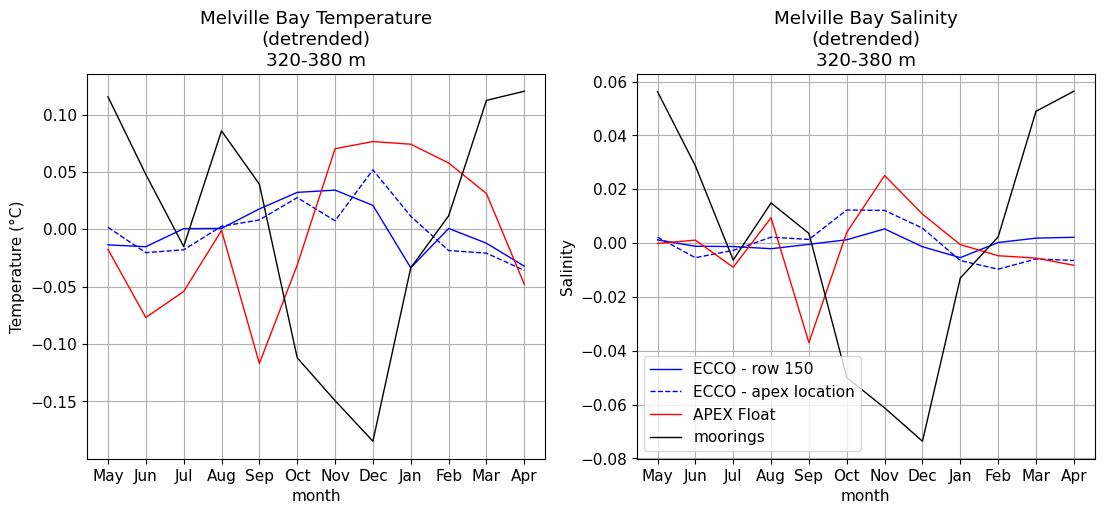

In [105]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_320m_detrended_month.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_320m_detrended_month.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_320m_temp_detrended_month.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_320m_detrended_month.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
# ax1.legend();
ax1.set_title('Melville Bay Temperature\n(detrended)\n320-380 m');

salt_row150_320m_detrended_month.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_320m_detrended_month.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_float_320m_salt_detrended_month.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_320m_detrended_month.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n(detrended)\n320-380 m');

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Salinity");

#### Normalize by SD

Normalize data by standard deviation

z-score = (x-mean)/sd <br>
where mean=0, sd=1


220-240 m

In [106]:
theta_row150_month_220m_norm = (theta_row150_220m_detrended_month-theta_row150_220m_detrended_month.mean())/theta_row150_220m_detrended_month.std()
ecco_theta_apex_month_220m_norm = (ecco_theta_apex_220m_detrended_month-ecco_theta_apex_220m_detrended_month.mean())/ecco_theta_apex_220m_detrended_month.std()
apex_temp_month_220m_norm = (apex_float_220m_temp_detrended_month-apex_float_220m_temp_detrended_month.mean())/apex_float_220m_temp_detrended_month.std()
mooring_temp_month_220m_norm = (mooring_temp_220m_detrended_month-mooring_temp_220m_detrended_month.mean())/mooring_temp_220m_detrended_month.std()

salt_row150_month_220m_norm = (salt_row150_220m_detrended_month-salt_row150_220m_detrended_month.mean())/salt_row150_220m_detrended_month.std()
ecco_salt_apex_month_220m_norm = (ecco_salt_apex_220m_detrended_month-ecco_salt_apex_220m_detrended_month.mean())/ecco_salt_apex_220m_detrended_month.std()
apex_salt_month_220m_norm = (apex_float_220m_salt_detrended_month-apex_float_220m_salt_detrended_month.mean())/apex_float_220m_salt_detrended_month.std()
mooring_salt_month_220m_norm = (mooring_salt_220m_detrended_month-mooring_salt_220m_detrended_month.mean())/mooring_salt_220m_detrended_month.std()

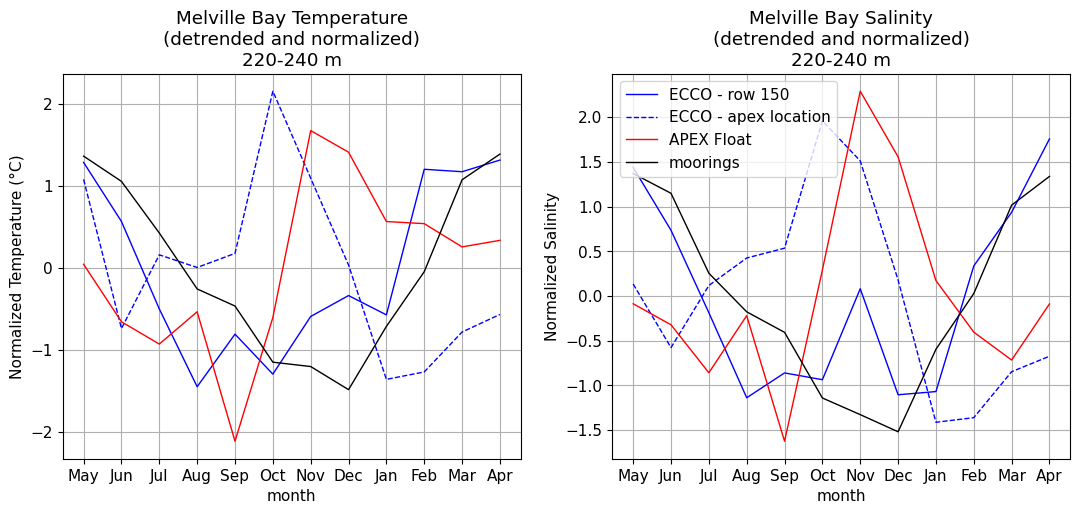

In [107]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_220m_norm.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_month_220m_norm.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_temp_month_220m_norm.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_220m_norm.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
# ax1.legend();
ax1.set_title('Melville Bay Temperature\n(detrended and normalized)\n220-240 m');

salt_row150_month_220m_norm.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_month_220m_norm.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_salt_month_220m_norm.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_220m_norm.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n(detrended and normalized)\n220-240 m');

ax1.set_ylabel("Normalized Temperature (°C)")
ax2.set_ylabel("Normalized Salinity");

#### 320-380 m

In [109]:
theta_row150_month_320m_norm = (theta_row150_320m_detrended_month-theta_row150_320m_detrended_month.mean())/theta_row150_320m_detrended_month.std()
ecco_theta_apex_month_320m_norm = (ecco_theta_apex_320m_detrended_month-ecco_theta_apex_320m_detrended_month.mean())/ecco_theta_apex_320m_detrended_month.std()
apex_temp_month_320m_norm = (apex_float_320m_temp_detrended_month-apex_float_320m_temp_detrended_month.mean())/apex_float_320m_temp_detrended_month.std()
mooring_temp_month_320m_norm = (mooring_temp_320m_detrended_month-mooring_temp_320m_detrended_month.mean())/mooring_temp_320m_detrended_month.std()

salt_row150_month_320m_norm = (salt_row150_320m_detrended_month-salt_row150_320m_detrended_month.mean())/salt_row150_320m_detrended_month.std()
ecco_salt_apex_month_320m_norm = (ecco_salt_apex_320m_detrended_month-ecco_salt_apex_320m_detrended_month.mean())/ecco_salt_apex_320m_detrended_month.std()
apex_salt_month_320m_norm = (apex_float_320m_salt_detrended_month-apex_float_320m_salt_detrended_month.mean())/apex_float_320m_salt_detrended_month.std()
mooring_salt_month_320m_norm = (mooring_salt_320m_detrended_month-mooring_salt_320m_detrended_month.mean())/mooring_salt_320m_detrended_month.std()

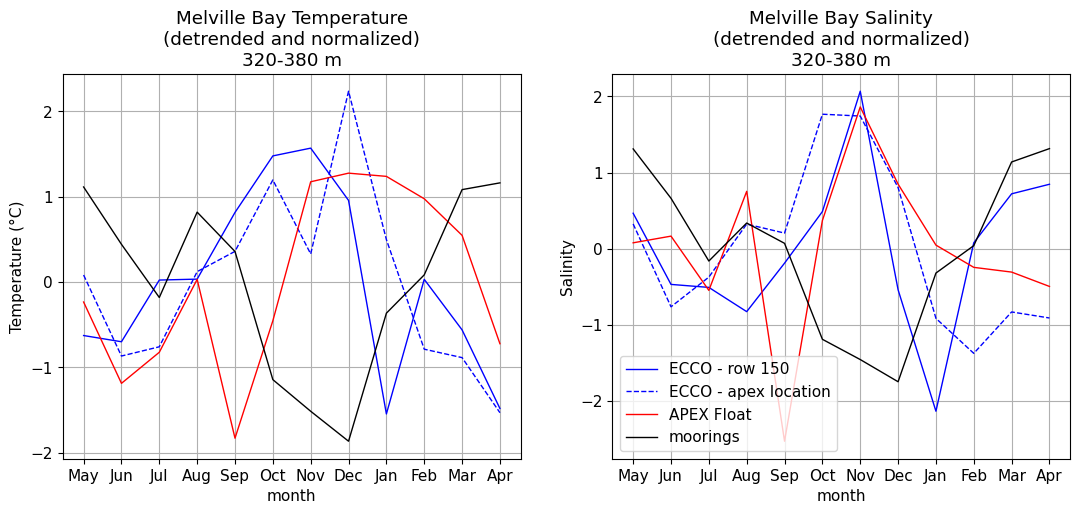

In [112]:
# temperature and salinity at 320-380 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_320m_norm.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_month_320m_norm.plot(ax=ax1,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_temp_month_320m_norm.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_320m_norm.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
# ax1.legend();
ax1.set_title('Melville Bay Temperature\n(detrended and normalized)\n320-380 m');

salt_row150_month_320m_norm.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_salt_apex_month_320m_norm.plot(ax=ax2,color='b', linestyle='dashed',linewidth=1,label='ECCO - apex location')
apex_salt_month_320m_norm.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_320m_norm.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n(detrended and normalized)\n320-380 m');

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Salinity");

In [38]:
## export normalized temperature monthly time series to add to float figure for manuscript

# first name the variables in the DataArray because it will automatically be saved as a dataset
theta_row150_month_320m_norm = theta_row150_month_320m_norm.rename("theta")
apex_temp_month_320m_norm = apex_temp_month_320m_norm.rename("temperature")
mooring_temp_month_320m_norm = mooring_temp_month_320m_norm.rename("temperature")

theta_row150_month_320m_norm.to_netcdf("temp_detrend_norm_nc/ecco_theta_row150_month_320m_norm.nc")
apex_temp_month_320m_norm.to_netcdf("temp_detrend_norm_nc/apex_temp_month_320m_norm.nc")
mooring_temp_month_320m_norm.to_netcdf("temp_detrend_norm_nc/mooring_temp_month_320m_norm.nc")

Plot only ECCO row 150 data

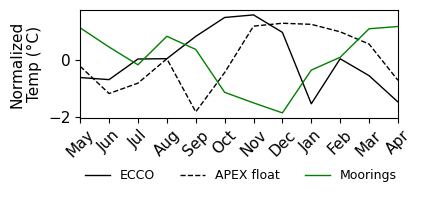

In [49]:
plt.rcParams["figure.figsize"] = (4.1, 1.4)
plt.rcParams['font.size'] = 11

theta_row150_month_320m_norm.plot(color='k', linestyle='solid',linewidth=1,label='ECCO')
apex_temp_month_320m_norm.plot(color='k', linestyle='dashed',linewidth=1,label='APEX float')
mooring_temp_month_320m_norm.plot(color='g', linestyle='solid',linewidth=1,label='Moorings')

plt.xticks(theta_row150_month_320m_norm.month.values,\
               rotation=45, horizontalalignment = 'center');

plt.margins(x=0)
plt.ylabel("Normalized\nTemp (°C)")
plt.xlabel("")

plt.legend(loc="lower left",fontsize=9,ncol=3,bbox_to_anchor=[-0.02, -0.7],frameon=False);

Plot also ECCO data from apex location

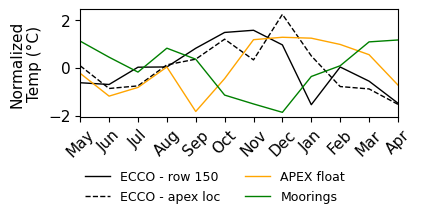

In [118]:
plt.rcParams["figure.figsize"] = (4.1, 1.4)
plt.rcParams['font.size'] = 11

theta_row150_month_320m_norm.plot(color='k', linestyle='solid',linewidth=1,label='ECCO - row 150')
ecco_theta_apex_month_320m_norm.plot(color='k', linestyle='dashed',linewidth=1,label='ECCO - apex loc')
apex_temp_month_320m_norm.plot(color='orange', linestyle='solid',linewidth=1,label='APEX float')
mooring_temp_month_320m_norm.plot(color='g', linestyle='solid',linewidth=1,label='Moorings')

plt.xticks(theta_row150_month_320m_norm.month.values,\
               rotation=45, horizontalalignment = 'center');

plt.margins(x=0)
plt.ylabel("Normalized\nTemp (°C)")
plt.xlabel("")

plt.legend(loc="lower left",fontsize=9,ncol=2,bbox_to_anchor=[-0.02, -0.9],frameon=False);